#**Importing Libraries**


In [1]:
import tensorflow as tf
import keras
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import sklearn
import torch
import scipy
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score,train_test_split

#**Importing Dataset**

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/merged_dataset_processed.csv")
dataset

,File,Filename,First_commit,Last_commit,Total_commits,TIME_COST_IN_DAYS,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,CYCLOMATIC COMPLEXITY,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause,Number_of_Authors,Time_Class
0,https://github.com/Anish-Agnihotri/dhof-loot/b...,images.js,"Aug 27, 2021","Aug 28, 2021",1,1,31,228,1,4,0,1,1,0,0,1,1
1,https://github.com/Anish-Agnihotri/dhof-loot/b...,index.js,"Aug 27, 2021","Aug 28, 2021",2,1,36,230,1,2,0,0,1,0,0,1,1
2,https://github.com/Anish-Agnihotri/dhof-loot/b...,parse.js,"Aug 27, 2021","Sep 3, 2021",8,7,53,467,6,6,1,0,6,0,0,1,1
3,https://github.com/HashLips/generative-art-ope...,index1.js,"Aug 24, 2021","Sep 1, 2021",7,8,183,1280,26,35,1,3,2,2,0,1,1
4,https://github.com/HashLips/generative-art-ope...,config.js,"Aug 24, 2021","Sep 2, 2021",7,9,113,637,10,16,1,5,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://github.com/mozilla/pdf.js/blob/master/...,simpleviewer.js,"Sep 30, 2014","Jul 29, 2021",23,2494,51,270,2,3,1,2,0,0,0,5,6
196,https://github.com/mozilla/pdf.js/blob/master/...,viewer.js,"Jul 27, 2016","Mar 12, 2021",23,1689,344,1930,35,68,18,18,0,2,0,5,5
197,https://github.com/mozilla/pdf.js/blob/master/...,pdf2svg.js,"Aug 14, 2014","Mar 12, 2021",25,2402,104,700,15,20,14,3,1,1,0,5,6
198,https://github.com/mozilla/pdf.js/blob/master/...,getinfo.js,"Apr 19, 2014","Mar 12, 2021",17,2519,55,391,9,11,7,1,1,0,0,5,6


#**Methodology 2(b.2)**

##**Seperating Labels from Dataset**

In [3]:
TCC_lbl = dataset["Time_Class"]

In [4]:
TCC_lbl.value_counts()

1    56
5    39
3    35
6    34
2    30
4     6
Name: Time_Class, dtype: int64

##**Keeping the columns with only numerical data**

In [5]:
dataset_unlbl = dataset.drop(columns=["File","Filename","First_commit","Last_commit","Time_Class","TIME_COST_IN_DAYS"])

In [6]:
dataset_unlbl

,Total_commits,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,CYCLOMATIC COMPLEXITY,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause,Number_of_Authors
0,1,31,228,1,4,0,1,1,0,0,1
1,2,36,230,1,2,0,0,1,0,0,1
2,8,53,467,6,6,1,0,6,0,0,1
3,7,183,1280,26,35,1,3,2,2,0,1
4,7,113,637,10,16,1,5,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,23,51,270,2,3,1,2,0,0,0,5
196,23,344,1930,35,68,18,18,0,2,0,5
197,25,104,700,15,20,14,3,1,1,0,5
198,17,55,391,9,11,7,1,1,0,0,5


##**Splitting the dataset into train and test**

In [7]:
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_unlbl, TCC_lbl, test_size=0.2, random_state=1)


In [8]:
print(dataset_X_train.shape)
print(dataset_X_test.shape)

(160, 11)
(40, 11)


##**Creating lists to store model data and scores**

In [9]:
Classifier = []
Type = []
hyper = []
Accuracy = []
F1_score = []
Recall = []
Precision = []

#**MACHINE LEARNING**

##**Creating models by tuning hyperparameters**

In [10]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score , accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()

# Create regularization solver space
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# Create regularization penalty space
penalty = ['l1','l2']
# Create regularization hyperparameter space
c_values = numpy.logspace(0, 5, 20)
# Create hyperparameter options
hyperparameters_LR = dict(solver=solvers,penalty=penalty,C=c_values)

#Using RepeatedStratifiedKFold perform 10 splits for cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Finding the Best Values of hyperparameters using GridSearchCV
clf_LR = GridSearchCV(estimator=classifier_LR, param_grid=hyperparameters_LR, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.svm import SVC
classifier_SVM = SVC()  
# defining parameter range
hyperparameters_SVM = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf']} 
  
clf_SVM = GridSearchCV(estimator=classifier_SVM, param_grid = hyperparameters_SVM ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [10,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
hyperparameters_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
  
clf_RF = GridSearchCV(estimator=classifier_RF, param_grid = hyperparameters_RF ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0) 

##**Training and testing before hyperparameter tuning**

In [11]:
SVM = classifier_SVM.fit(dataset_X_train, dataset_y_train)

y_pred_SVM = SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM))


Classifier.append("SVM")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM,average='macro'))
#ROC_AUC.append(roc_curve(dataset_y_test,y_pred_SVM,multi_class='ovr'))

Test - ACC :  0.35
Test  : 
              precision    recall  f1-score   support

           1       0.33      0.92      0.49        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           6       0.60      0.43      0.50         7

    accuracy                           0.35        40
   macro avg       0.16      0.22      0.16        40
weighted avg       0.20      0.35      0.23        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
LR = classifier_LR.fit(dataset_X_train, dataset_y_train)

# Predicting the Test set results
y_pred_LR = LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR))


Classifier.append("LR")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR))
F1_score.append(f1_score(dataset_y_test,y_pred_LR,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

Test - ACC :  0.25
Test  : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         7
           3       0.17      0.25      0.20         4
           4       0.00      0.00      0.00         2
           5       0.27      0.38      0.32         8
           6       0.30      0.86      0.44         7

    accuracy                           0.25        40
   macro avg       0.12      0.25      0.16        40
weighted avg       0.12      0.25      0.16        40



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [13]:
RF = classifier_RF.fit(dataset_X_train, dataset_y_train)


# Predicting the Test set results
y_pred_RF = RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF))



Classifier.append("RF")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF))
F1_score.append(f1_score(dataset_y_test,y_pred_RF,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

Test - ACC :  0.525
Test  : 
              precision    recall  f1-score   support

           1       0.54      0.58      0.56        12
           2       0.50      0.14      0.22         7
           3       0.38      0.75      0.50         4
           4       0.00      0.00      0.00         2
           5       0.57      0.50      0.53         8
           6       0.60      0.86      0.71         7

    accuracy                           0.53        40
   macro avg       0.43      0.47      0.42        40
weighted avg       0.51      0.53      0.49        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Training and testing after hyperparameter tuning**

In [14]:
best_SVM = clf_SVM.fit(dataset_X_train, dataset_y_train)

print(best_SVM.best_params_)
print("-------------------------------")

y_pred_SVM_best = best_SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM_best))


Classifier.append("SVM")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM_best))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_SVM,multi_class="ovr"))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 10000, 'gamma': 1e-05, 'kernel': 'rbf'}
-------------------------------
Test - ACC :  0.35
Test  : 
              precision    recall  f1-score   support

           1       0.40      0.67      0.50        12
           2       0.00      0.00      0.00         7
           3       0.29      0.50      0.36         4
           4       0.00      0.00      0.00         2
           5       0.50      0.38      0.43         8
           6       0.20      0.14      0.17         7

    accuracy                           0.35        40
   macro avg       0.23      0.28      0.24        40
weighted avg       0.28      0.35      0.30        40



In [15]:
best_LR = clf_LR.fit(dataset_X_train, dataset_y_train)

print(best_LR.best_params_)
print("-------------------------------")

# Predicting the Test set results
y_pred_LR_best = best_LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR_best))


Classifier.append("LR")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR_best))
F1_score.append(f1_score(dataset_y_test,y_pred_LR_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 54555.947811685146, 'penalty': 'l2', 'solver': 'newton-cg'}
-------------------------------
Test - ACC :  0.45
Test  : 
              precision    recall  f1-score   support

           1       0.47      0.58      0.52        12
           2       0.50      0.29      0.36         7
           3       0.40      0.50      0.44         4
           4       0.00      0.00      0.00         2
           5       0.29      0.25      0.27         8
           6       0.71      0.71      0.71         7

    accuracy                           0.45        40
   macro avg       0.39      0.39      0.38        40
weighted avg       0.45      0.45      0.44        40



/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-------------------------------
Test - ACC :  0.525
Test  : 
              precision    recall  f1-score   support

           1       0.54      0.58      0.56        12
           2       0.50      0.14      0.22         7
           3       0.44      1.00      0.62         4
           4       0.00      0.00      0.00         2
           5       0.57      0.50      0.53         8
           6       0.56      0.71      0.63         7

    accuracy                           0.53        40
   macro avg       0.43      0.49      0.43        40
weighted avg       0.50      0.53      0.48        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


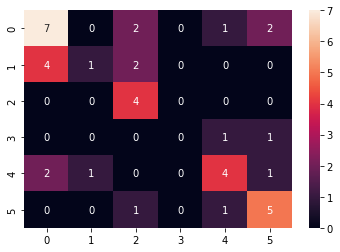

In [ ]:
best_RF = clf_RF.fit(dataset_X_train, dataset_y_train)

print(best_RF.best_params_)
print("-------------------------------")
# Predicting the Test set results
y_pred_RF_best = best_RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF_best))



Classifier.append("RF")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF_best))
F1_score.append(f1_score(dataset_y_test,y_pred_RF_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF_best,average='macro'))
ml_cm = confusion_matrix(dataset_y_test,y_pred_RF_best)
sns.heatmap(ml_cm, annot=True)
plt.show()
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

#**DEEP LEARNING**

In [ ]:
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

##**BEFORE HYPERPARAMETER TUNING**

###**Creating models**

In [ ]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# BiLSTM
model_bilstm = create_model_bilstm(32)
# GRU and LSTM
model_gru = create_model(32, GRU)
model_lstm = create_model(32, LSTM)

###**Reshaping and changing data type of data as per model**

In [ ]:
dataset_X_train1 = dataset_X_train.values.reshape(160,11,1)
print(dataset_X_train1.dtype)
print(dataset_y_train.dtype)
dataset_X_train1 = dataset_X_train1.astype(float)
dataset_y_train1 = dataset_y_train.astype(float)
print(dataset_X_train1.dtype)
print(dataset_y_train1.dtype)

int64
int64
float64
float64


###**Training the deep learning models**

In [ ]:

# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 1000,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks = [early_stop])
    return history



In [ ]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/1000
13/13 [==============================] - 14s 144ms/step - loss: 8.2464 - val_loss: 5.0943
Epoch 2/1000
13/13 [==============================] - 0s 15ms/step - loss: 3.4144 - val_loss: 2.9751
Epoch 3/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.9334 - val_loss: 3.3378
Epoch 4/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.6032 - val_loss: 3.2916
Epoch 5/1000
13/13 [==============================] - 0s 19ms/step - loss: 2.3520 - val_loss: 3.0170
Epoch 6/1000
13/13 [==============================] - 0s 19ms/step - loss: 2.1723 - val_loss: 3.1962
Epoch 7/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.0974 - val_loss: 3.1159
Epoch 8/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.0242 - val_loss: 3.1552
Epoch 9/1000
13/13 [==============================] - 0s 16ms/step - loss: 1.9844 - val_loss: 3.1174
Epoch 10/1000
13/13 [==============================] - 0s 18ms/step - loss: 1.9448 - val_

In [ ]:
history_lstm = fit_model(model_lstm)

Epoch 1/1000
13/13 [==============================] - 4s 78ms/step - loss: 10.3861 - val_loss: 9.1481
Epoch 2/1000
13/13 [==============================] - 0s 11ms/step - loss: 4.7556 - val_loss: 3.6812
Epoch 3/1000
13/13 [==============================] - 0s 12ms/step - loss: 3.4230 - val_loss: 3.1941
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.9818 - val_loss: 3.5107
Epoch 5/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.7840 - val_loss: 3.5810
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.7202 - val_loss: 3.3776
Epoch 7/1000
13/13 [==============================] - 0s 12ms/step - loss: 2.4821 - val_loss: 3.5186
Epoch 8/1000
13/13 [==============================] - 0s 11ms/step - loss: 2.3843 - val_loss: 3.6799
Epoch 9/1000
13/13 [==============================] - 0s 11ms/step - loss: 2.3089 - val_loss: 3.5940
Epoch 10/1000
13/13 [==============================] - 0s 11ms/step - loss: 2.3482 - val_l

In [ ]:
history_gru = fit_model(model_gru)

Epoch 1/1000
13/13 [==============================] - 4s 72ms/step - loss: 10.9364 - val_loss: 10.6887
Epoch 2/1000
13/13 [==============================] - 0s 11ms/step - loss: 5.1751 - val_loss: 4.6287
Epoch 3/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.0353 - val_loss: 3.1233
Epoch 4/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.8758 - val_loss: 3.6491
Epoch 5/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.8038 - val_loss: 3.8527
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.5732 - val_loss: 3.6577
Epoch 7/1000
13/13 [==============================] - 0s 12ms/step - loss: 2.5448 - val_loss: 3.6850
Epoch 8/1000
13/13 [==============================] - 0s 12ms/step - loss: 2.4682 - val_loss: 3.7636
Epoch 9/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.2708 - val_loss: 3.6120
Epoch 10/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.3544 - val_l

###**Plotting graph for train and validation loss**

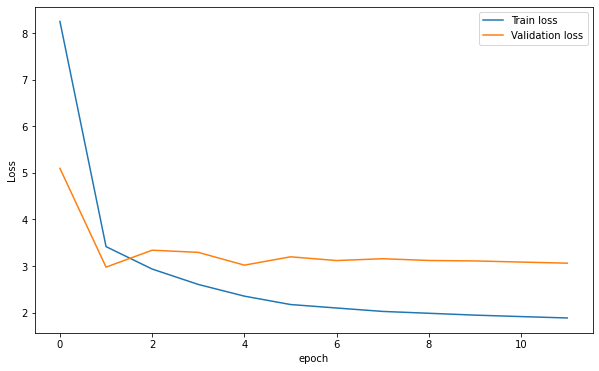

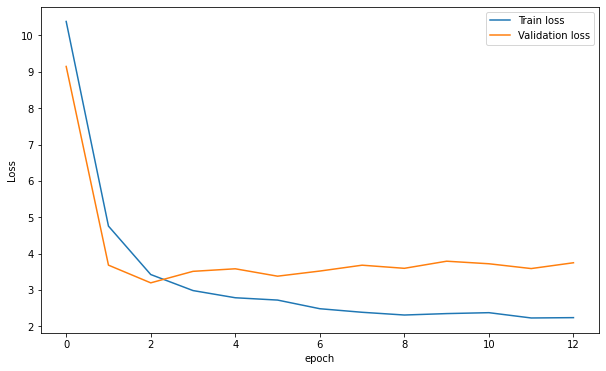

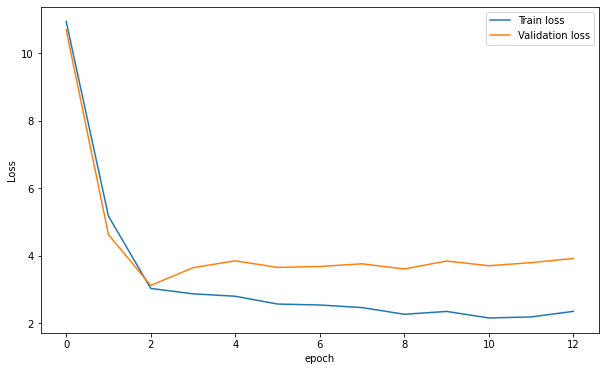

In [ ]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm)
plot_loss (history_lstm)
plot_loss (history_gru)

###**Testing the deep learning models**

In [ ]:
dataset_X_test1 = dataset_X_test.values.reshape(40,11,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm = prediction_func(model_bilstm)
prediction_lstm = prediction_func(model_lstm)
prediction_gru = prediction_func(model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm.round(), dataset_y_test))
print(classification_report(prediction_bilstm.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_bilstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm.round(), dataset_y_test))
print(classification_report(prediction_lstm.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_lstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru.round(), dataset_y_test))
print(classification_report(prediction_gru.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_gru.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru.round(), dataset_y_test,average='macro'))


Accuracy :  0.25
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.71      0.29      0.42        17
         3.0       0.25      0.09      0.13        11
         4.0       0.50      0.20      0.29         5
         5.0       0.00      0.00      0.00         4
         6.0       0.43      1.00      0.60         3

    accuracy                           0.25        40
   macro avg       0.32      0.26      0.24        40
weighted avg       0.47      0.25      0.29        40

Accuracy :  0.15
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.57      0.22      0.32        18
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         6
         6.0       0.29      1.00      0.44         2

    accuracy                           0.15

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**AFTER HYPERPARAMETER TUNING**

###**Creating models**

In [ ]:
# Create BiLSTM model
def create_best_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model
# Create LSTM or GRU model
def create_best_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model

# BiLSTM
best_model_bilstm = create_best_model_bilstm(32)
# GRU and LSTM
best_model_gru = create_best_model(32, GRU)
best_model_lstm = create_best_model(32, LSTM)

##**Hyperparameter Tuning - 1 : Best Epoch Value**

In [ ]:
def best_ep_fit_model(model,ep):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = ep,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks=[early_stop])
    return history


###**Training models for range of epoch values and measure Mean Square Error(mse) score**

In [ ]:
epochs_range= [500,1000,2000,5000,7000]
mse_dict_bilstm1 = {}
mse_dict_lstm1 = {}
mse_dict_gru1 = {}
for i in epochs_range:
  history_bilstm1 = best_ep_fit_model(best_model_bilstm,i)
  mse_dict_bilstm1[i]=history_bilstm1.history['mse']
  history_lstm1 = best_ep_fit_model(best_model_lstm,i)
  mse_dict_lstm1[i]=history_lstm1.history['mse']
  history_gru1 = best_ep_fit_model(best_model_gru,i)
  mse_dict_gru1[i]=history_gru1.history['mse']

Epoch 1/500
13/13 [==============================] - 9s 168ms/step - loss: 7.4156 - mse: 7.4156 - val_loss: 4.0877 - val_mse: 4.0877
Epoch 2/500
13/13 [==============================] - 0s 18ms/step - loss: 3.1472 - mse: 3.1472 - val_loss: 2.8574 - val_mse: 2.8574
Epoch 3/500
13/13 [==============================] - 0s 18ms/step - loss: 2.6388 - mse: 2.6388 - val_loss: 3.5090 - val_mse: 3.5090
Epoch 4/500
13/13 [==============================] - 0s 17ms/step - loss: 2.4238 - mse: 2.4238 - val_loss: 3.1744 - val_mse: 3.1744
Epoch 5/500
13/13 [==============================] - 0s 16ms/step - loss: 2.2243 - mse: 2.2243 - val_loss: 3.2549 - val_mse: 3.2549
Epoch 6/500
13/13 [==============================] - 0s 15ms/step - loss: 2.1429 - mse: 2.1429 - val_loss: 3.3715 - val_mse: 3.3715
Epoch 7/500
13/13 [==============================] - 0s 17ms/step - loss: 2.0956 - mse: 2.0956 - val_loss: 3.3354 - val_mse: 3.3354
Epoch 8/500
13/13 [==============================] - 0s 19ms/step - loss: 2

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [ ]:
mse_dict_bilstm1

{500: [7.4156270027160645,
  3.1471846103668213,
  2.6387593746185303,
  2.423835515975952,
  2.224316358566284,
  2.1429433822631836,
  2.0956130027770996,
  2.0515925884246826,
  2.0174548625946045,
  1.9832351207733154,
  1.9540562629699707,
  1.925150990486145],
 1000: [1.8982843160629272,
  1.8725900650024414,
  1.848510980606079,
  1.825953483581543,
  1.8050618171691895,
  1.7858166694641113,
  1.7681692838668823,
  1.752061367034912,
  1.7373995780944824,
  1.7240763902664185,
  1.7119048833847046,
  1.700684905052185,
  1.6901572942733765,
  1.6801007986068726,
  1.6703232526779175,
  1.6606792211532593,
  1.6510429382324219,
  1.6413121223449707,
  1.6314113140106201,
  1.6212880611419678,
  1.61089026927948,
  1.6001657247543335,
  1.5890967845916748,
  1.5777294635772705,
  1.5661252737045288,
  1.5541582107543945,
  1.5414388179779053,
  1.5277541875839233,
  1.5132629871368408,
  1.4978454113006592,
  1.4823541641235352,
  1.4666094779968262,
  1.4506834745407104,
  1.434

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [ ]:
for i in epochs_range:
  mse_dict_bilstm1[i] = mse_dict_bilstm1[i][-10:]
  mse_dict_lstm1[i] = mse_dict_lstm1[i][-10:]
  mse_dict_gru1[i] = mse_dict_gru1[i][-10:]

###**Bilstm**

In [ ]:
mse_epochs_bilstm1 = pd.DataFrame.from_dict(mse_dict_bilstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_bilstm1

,500,1000,2000,5000,7000
mean,2.145696,0.927434,0.704293,0.595874,0.409176
std,0.227604,0.065380,0.036776,0.075377,0.067871
min,1.925151,0.878723,0.679623,0.493885,0.342033
25%,1.991790,0.893480,0.686223,0.536524,0.362339
50%,2.073603,0.897792,0.688434,0.591175,0.394771
75%,2.203973,0.926595,0.706606,0.654698,0.420478
max,2.638759,1.081982,0.798890,0.703967,0.561855


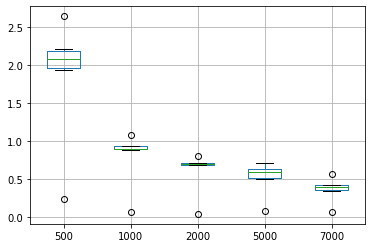

In [ ]:
boxplot_11 = mse_epochs_bilstm1.boxplot(column=[500,1000,2000,5000,7000])

###**Lstm**

In [ ]:
mse_epochs_lstm1 = pd.DataFrame.from_dict(mse_dict_lstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_lstm1

,500,1000,2000,5000,7000
mean,2.370339,2.132471,1.469871,1.195794,1.037049
std,0.099213,0.081185,0.128275,0.097038,0.077500
min,2.158336,2.033271,1.298252,0.999841,0.936398
25%,2.331560,2.074308,1.370220,1.148060,0.985036
50%,2.366039,2.115640,1.470525,1.180862,1.026830
75%,2.458450,2.163638,1.552268,1.258278,1.079618
max,2.469786,2.292219,1.660881,1.329059,1.152288


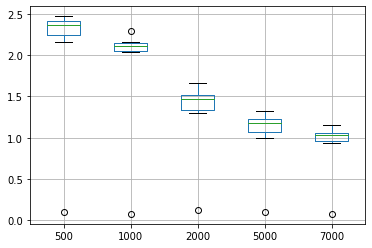

In [ ]:
boxplot_12 = mse_epochs_lstm1.boxplot(column=[500,1000,2000,5000,7000])

###**GRU**

In [ ]:
mse_epochs_gru1 = pd.DataFrame.from_dict(mse_dict_gru1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_gru1

,500,1000,2000,5000,7000
mean,2.573657,2.035208,1.519016,1.300693,1.138057
std,0.180767,0.083957,0.094527,0.132818,0.034046
min,2.267959,1.930602,1.390885,1.043027,1.087633
25%,2.496645,1.964797,1.466695,1.223635,1.113641
50%,2.545806,2.031365,1.495069,1.311527,1.137494
75%,2.669472,2.067117,1.586880,1.390691,1.165424
max,2.855687,2.188284,1.692930,1.501753,1.184987


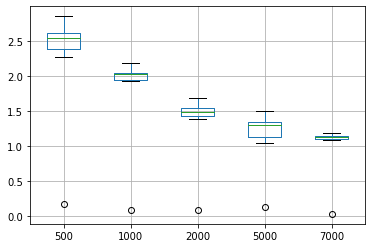

In [ ]:
boxplot_13 = mse_epochs_gru1.boxplot(column=[500,1000,2000,5000,7000])

##**Hyperparameter Tuning - 2 : Best Batch Size**

In [ ]:
def best_bs_fit_model(model,bs):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = bs, 
                        shuffle = False, callbacks=[early_stop])
    return history

###**Training models for range of batch size values and measure Mean Square Error(mse) score**

In [ ]:
batch_range = [4,5,8,10,20]
mse_dict_bilstm2 = {}
mse_dict_lstm2 = {}
mse_dict_gru2 = {}
for i in batch_range:
  history_bilstm2 = best_bs_fit_model(best_model_bilstm,i)
  mse_dict_bilstm2[i]=history_bilstm2.history['mse']
  history_lstm2 = best_bs_fit_model(best_model_lstm,i)
  mse_dict_lstm2[i]=history_lstm2.history['mse']
  history_gru2 = best_bs_fit_model(best_model_gru,i)
  mse_dict_gru2[i]=history_gru2.history['mse']


Epoch 1/7000
32/32 [==============================] - 5s 63ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 3.2670 - val_mse: 3.2670
Epoch 2/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.4768 - mse: 1.4768 - val_loss: 3.1252 - val_mse: 3.1252
Epoch 3/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.0389 - mse: 1.0389 - val_loss: 3.7870 - val_mse: 3.7870
Epoch 4/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.1030 - mse: 1.1030 - val_loss: 3.5699 - val_mse: 3.5699
Epoch 5/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.3568 - mse: 1.3568 - val_loss: 2.7128 - val_mse: 2.7128
Epoch 6/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.3043 - mse: 1.3043 - val_loss: 2.8036 - val_mse: 2.8036
Epoch 7/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.0987 - mse: 1.0987 - val_loss: 3.5605 - val_mse: 3.5605
Epoch 8/7000
32/32 [==============================] - 0s 14ms/step - 

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [ ]:
mse_dict_bilstm2

{4: [1.002536416053772,
  1.476759672164917,
  1.038872241973877,
  1.10304856300354,
  1.356808066368103,
  1.3043287992477417,
  1.0986731052398682,
  0.9139488339424133,
  0.8086413145065308,
  0.9122097492218018,
  0.9884161353111267,
  1.4771919250488281,
  1.3044848442077637,
  1.0952883958816528,
  0.8934259414672852,
  0.7293363809585571,
  0.6803758144378662,
  0.7593238353729248,
  0.6853146553039551,
  0.6225676536560059,
  0.560573160648346,
  0.6712350845336914,
  0.5499433875083923,
  0.6666275858879089,
  0.7237181067466736,
  0.6468750834465027,
  0.5630970001220703,
  0.5834894776344299,
  0.6018798351287842,
  0.4727509617805481,
  0.709244966506958],
 5: [0.4748428463935852,
  0.3706660270690918,
  0.3359748423099518,
  0.3267630338668823,
  0.2458728700876236,
  0.2186250388622284,
  0.1915377974510193,
  0.178770050406456,
  0.1671481728553772,
  0.15624737739562988,
  0.14552651345729828],
 8: [0.1244838610291481,
  0.11259321868419647,
  0.10840319097042084,
  0.

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [ ]:
for i in batch_range:
  mse_dict_bilstm2[i] = mse_dict_bilstm2[i][-10:]
  mse_dict_lstm2[i] = mse_dict_lstm2[i][-10:]
  mse_dict_gru2[i] = mse_dict_gru2[i][-10:]

###**Bilstm**

In [ ]:
mse_batch_bilstm2 = pd.DataFrame.from_dict(mse_dict_bilstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_bilstm2

,4,5,8,10,20
mean,0.618886,0.233713,0.085111,0.042600,0.024488
std,0.078684,0.082498,0.013709,0.006861,0.001909
min,0.472751,0.145527,0.065955,0.033232,0.021809
25%,0.568195,0.170054,0.074975,0.037297,0.023044
50%,0.624377,0.205081,0.084218,0.042105,0.024375
75%,0.670083,0.306540,0.094485,0.047543,0.025839
max,0.723718,0.370666,0.108403,0.053673,0.027525


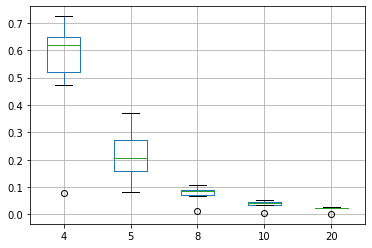

In [ ]:
boxplot_21 = mse_batch_bilstm2.boxplot(column=[4,5,8,10,20])

###**Lstm**

In [ ]:
mse_batch_lstm2 = pd.DataFrame.from_dict(mse_dict_lstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_lstm2

,4,5,8,10,20
mean,1.172346,0.967269,0.760264,0.645496,0.569247
std,0.136546,0.131216,0.082914,0.066615,0.052556
min,1.003074,0.821790,0.580247,0.550817,0.499118
25%,1.099067,0.877950,0.739257,0.607008,0.527236
50%,1.159458,0.946508,0.753077,0.644381,0.559849
75%,1.216097,0.981576,0.803043,0.676387,0.616114
max,1.478099,1.273093,0.882506,0.767429,0.642676


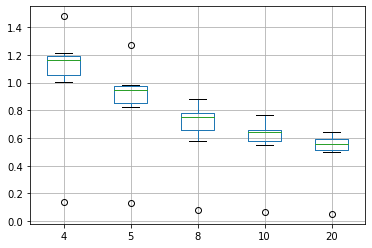

In [ ]:
boxplot_22 = mse_batch_lstm2.boxplot(column=[4,5,8,10,20])

###**GRU**

In [ ]:
mse_batch_gru2 = pd.DataFrame.from_dict(mse_dict_gru2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_gru2

,4,5,8,10,20
mean,1.014629,0.824546,0.663805,0.609943,0.557876
std,0.060491,0.099845,0.070419,0.034894,0.038644
min,0.952667,0.701406,0.592487,0.572113,0.506819
25%,0.977543,0.747996,0.623569,0.577213,0.533749
50%,0.997814,0.792922,0.654949,0.604844,0.557315
75%,1.030079,0.890117,0.666448,0.634615,0.573063
max,1.144812,1.021381,0.831495,0.659656,0.629223


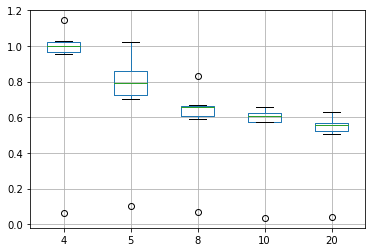

In [ ]:
boxplot_23 = mse_batch_gru2.boxplot(column=[4,5,8,10,20])

##**Training the Models**

In [ ]:
def best_fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = 20, 
                        shuffle = False, callbacks=[early_stop])
    return history

In [ ]:
history_bilstm_best = best_fit_model(best_model_bilstm)

Epoch 1/7000
7/7 [==============================] - 0s 26ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 2.5385 - val_mse: 2.5385
Epoch 2/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 2.5389 - val_mse: 2.5389
Epoch 3/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 2.5392 - val_mse: 2.5392
Epoch 4/7000
7/7 [==============================] - 0s 20ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 2.5396 - val_mse: 2.5396
Epoch 5/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 2.5399 - val_mse: 2.5399
Epoch 6/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 2.5401 - val_mse: 2.5401
Epoch 7/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 2.5403 - val_mse: 2.5403
Epoch 8/7000
7/7 [==============================] - 0s 21ms/step - loss: 0.0180 - m

In [ ]:
history_lstm_best = best_fit_model(best_model_lstm)

Epoch 1/7000
7/7 [==============================] - 0s 21ms/step - loss: 0.5430 - mse: 0.5430 - val_loss: 2.7930 - val_mse: 2.7930
Epoch 2/7000
7/7 [==============================] - 0s 14ms/step - loss: 0.4486 - mse: 0.4486 - val_loss: 2.9960 - val_mse: 2.9960
Epoch 3/7000
7/7 [==============================] - 0s 15ms/step - loss: 0.6362 - mse: 0.6362 - val_loss: 2.4183 - val_mse: 2.4183
Epoch 4/7000
7/7 [==============================] - 0s 14ms/step - loss: 0.5373 - mse: 0.5373 - val_loss: 3.0845 - val_mse: 3.0845
Epoch 5/7000
7/7 [==============================] - 0s 16ms/step - loss: 0.5078 - mse: 0.5078 - val_loss: 2.8760 - val_mse: 2.8760
Epoch 6/7000
7/7 [==============================] - 0s 14ms/step - loss: 0.5237 - mse: 0.5237 - val_loss: 2.6331 - val_mse: 2.6331
Epoch 7/7000
7/7 [==============================] - 0s 16ms/step - loss: 0.4533 - mse: 0.4533 - val_loss: 2.9832 - val_mse: 2.9832
Epoch 8/7000
7/7 [==============================] - 0s 13ms/step - loss: 0.4863 - m

In [ ]:
history_gru_best = best_fit_model(best_model_gru)

Epoch 1/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.6324 - mse: 0.6324 - val_loss: 3.0411 - val_mse: 3.0411
Epoch 2/7000
7/7 [==============================] - 0s 15ms/step - loss: 0.5172 - mse: 0.5172 - val_loss: 2.9024 - val_mse: 2.9024
Epoch 3/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.5047 - mse: 0.5047 - val_loss: 3.2239 - val_mse: 3.2239
Epoch 4/7000
7/7 [==============================] - 0s 13ms/step - loss: 0.4229 - mse: 0.4229 - val_loss: 3.3396 - val_mse: 3.3396
Epoch 5/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.5374 - mse: 0.5374 - val_loss: 3.1884 - val_mse: 3.1884
Epoch 6/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.4823 - mse: 0.4823 - val_loss: 3.1223 - val_mse: 3.1223
Epoch 7/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.5424 - mse: 0.5424 - val_loss: 3.1989 - val_mse: 3.1989
Epoch 8/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.4871 - m

##**Plotting train loss and validation loss graph**

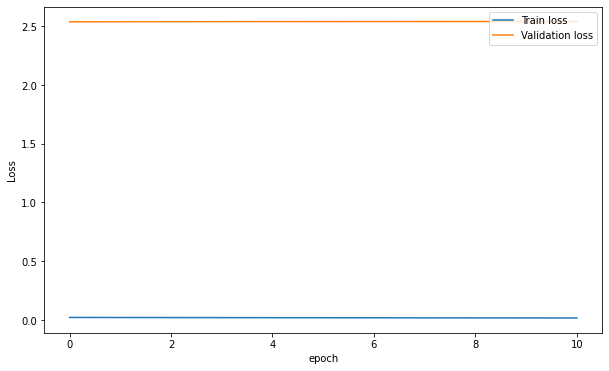

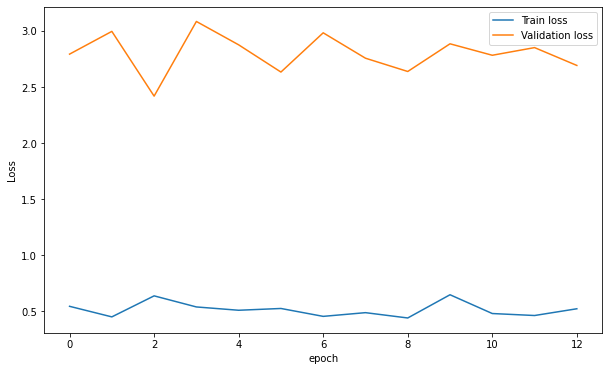

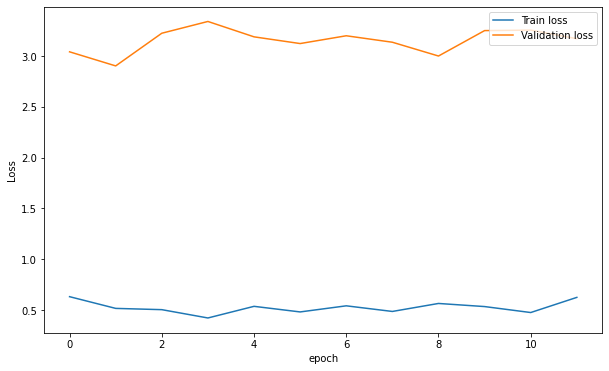

In [ ]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm_best)
plot_loss (history_lstm_best)
plot_loss (history_gru_best)

##**Testing the models**

In [ ]:
dataset_X_test1 = dataset_X_test.values.reshape(40,11,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def best_prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm_best = best_prediction_func(best_model_bilstm)
prediction_lstm_best = best_prediction_func(best_model_lstm)
prediction_gru_best = best_prediction_func(best_model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
print(classification_report(prediction_bilstm_best.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm_best.round(), dataset_y_test))
print(classification_report(prediction_lstm_best.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_lstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru_best.round(), dataset_y_test))
print(classification_report(prediction_gru_best.round(), dataset_y_test))

confusion

Classifier.append("GRU")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_gru_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru_best.round(), dataset_y_test,average='macro'))

Accuracy :  0.325
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.50      0.67      0.57         9
         2.0       0.14      0.25      0.18         4
         3.0       0.25      0.11      0.15         9
         4.0       0.50      0.14      0.22         7
         5.0       0.25      0.40      0.31         5
         6.0       0.29      0.67      0.40         3

    accuracy                           0.33        40
   macro avg       0.28      0.32      0.26        40
weighted avg       0.32      0.33      0.29        40

Accuracy :  0.4
              precision    recall  f1-score   support

         1.0       0.58      0.58      0.58        12
         2.0       0.29      0.33      0.31         6
         3.0       0.00      0.00      0.00         4
         4.0       1.00      0.29      0.44         7
         5.0       0.38      0.43      0.40         7
         6.0       0.29      0.50      0.36 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Scores Evaluation**

In [ ]:
scores = pd.DataFrame (Classifier,columns=['Classifier'])
scores['Type'] = Type
scores['Hyperparameter_Tuning'] = hyper
scores['Accuracy'] = Accuracy
scores['Recall'] = Recall
scores['Precision'] = Precision
scores['F1_score'] = F1_score

In [ ]:
scores

,Classifier,Type,Hyperparameter_Tuning,Accuracy,Recall,Precision,F1_score
0,SVM,ML,No,0.350,0.224206,0.155556,0.164815
1,LR,ML,No,0.250,0.247024,0.123232,0.160039
2,RF,ML,No,0.500,0.448413,0.351648,0.384145
3,SVM,ML,Yes,0.350,0.280754,0.230952,0.243146
4,LR,ML,Yes,0.450,0.388889,0.394444,0.384592
5,RF,ML,Yes,0.500,0.448413,0.405159,0.404365
6,BILSTM,DL,No,0.250,0.264171,0.315476,0.239286
7,LSTM,DL,No,0.150,0.203704,0.142857,0.127407
8,GRU,DL,No,0.225,0.344907,0.281746,0.198810
9,BILSTM,DL,Yes,0.325,0.319615,0.275510,0.262430


##**Comparision of Machine Learning models before and after hyperparameter tuning**

In [ ]:
ml_scores = scores.loc[scores['Type']=="ML"]

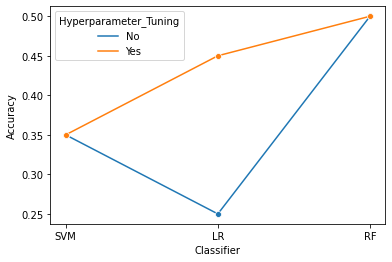

In [ ]:
import seaborn as sns
sns.lineplot(x='Classifier',y='Accuracy',data=ml_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Deep Learning models before and after hyperparameter tuning**

In [ ]:
dl_scores= scores.loc[scores['Type']=="DL"]

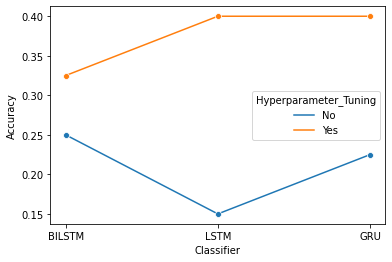

In [ ]:
sns.lineplot(x='Classifier',y='Accuracy',data=dl_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Machine Learning and Deep Learning models after hyperparameter tuning as performance was better only after hyperparameter tuning**

In [ ]:
com_scores = scores.loc[scores['Hyperparameter_Tuning']=="Yes"]

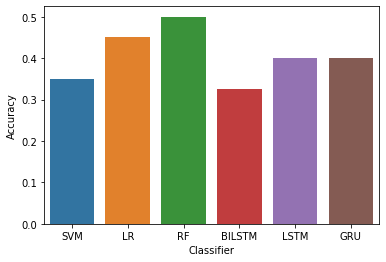

In [ ]:
sns.barplot(x='Classifier',y='Accuracy',data=com_scores)

In [ ]:
scores.to_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Results/M2(b.2).csv",index=False)